## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Explore the dataset

In [2]:
path = "airlines_delay.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


## Check for null values/duplicates

In [4]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [5]:
df.duplicated().sum()

216618

## Remove duplicates

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Data visualization

In [7]:
df1 = df.copy()

In [55]:
df1.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


## Categorize class column for better visualization 

In [56]:
df1['Class'] = df1['Class'].map({0:'Economy_class', 1:'First_class'})
df1.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,Economy_class
1,6948.0,360.0,146.0,OO,COS,ORD,4,Economy_class
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,Economy_class
3,31.0,1410.0,344.0,US,OGG,PHX,6,Economy_class
4,563.0,692.0,98.0,FL,BMI,ATL,4,Economy_class


In [57]:
df2 = df1.groupby('Class')['Airline'].value_counts().reset_index()
df2.head(3)


,Class,Airline,count
0,Economy_class,DL,21045
1,Economy_class,WN,19763
2,Economy_class,OO,18575


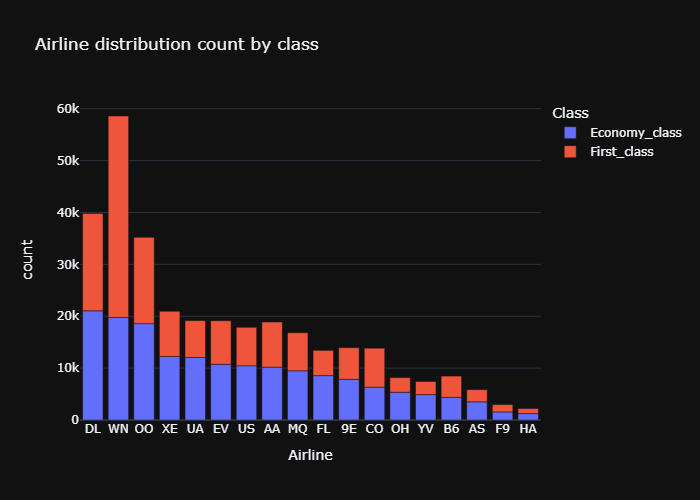

In [58]:
fig = px.bar(df2, x='Airline', y='count', color='Class', template='plotly_dark', title='Airline distribution count by class')
fig.show(renderer='png')

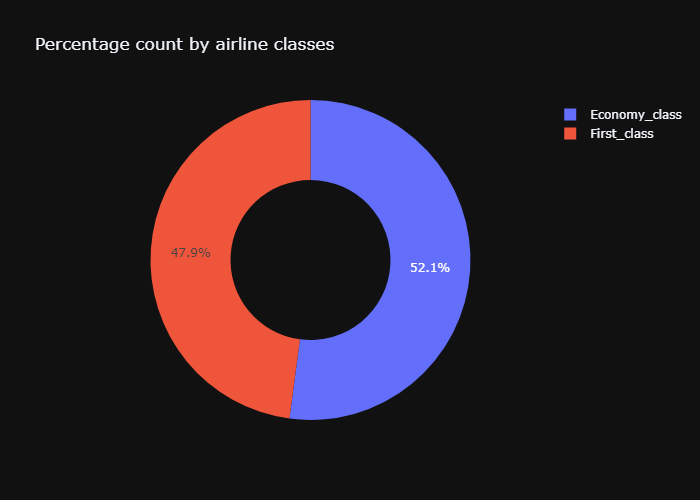

In [59]:
fig = px.pie(df2, names='Class', values='count', hole=0.5, template='plotly_dark', title='Percentage count by airline classes')
fig.show(renderer='png')

In [60]:
df1['DayOfWeek'] = df1['DayOfWeek'].map({1:'Monday', 2:'Tuesday', 3:'wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})
df1.head(2)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,Monday,Economy_class
1,6948.0,360.0,146.0,OO,COS,ORD,Thursday,Economy_class


In [9]:
df2 = df1.groupby('DayOfWeek')[['AirportFrom', 'AirportTo']].value_counts().reset_index().head(300)
df2.head(3)

,DayOfWeek,AirportFrom,AirportTo,count
0,1,LAX,SFO,93
1,1,SFO,LAX,90
2,1,LGA,ORD,78


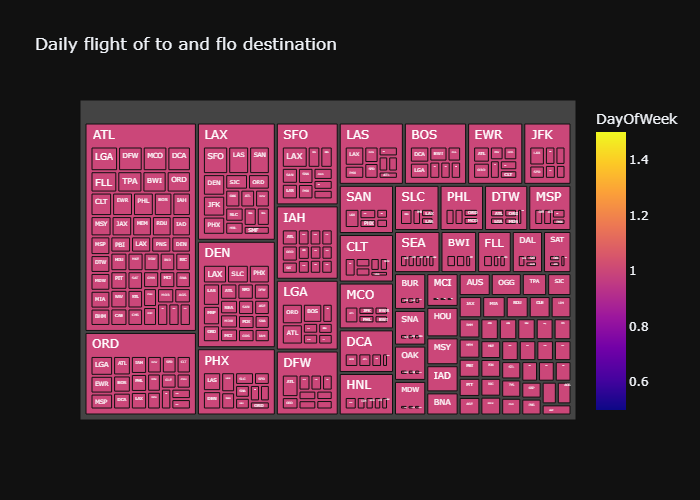

In [13]:
fig = px.treemap(df2, path=['AirportFrom', 'AirportTo'], values='count', color='DayOfWeek', template='plotly_dark', title='Daily flight of to and flo destination')
fig.show(renderer='png')

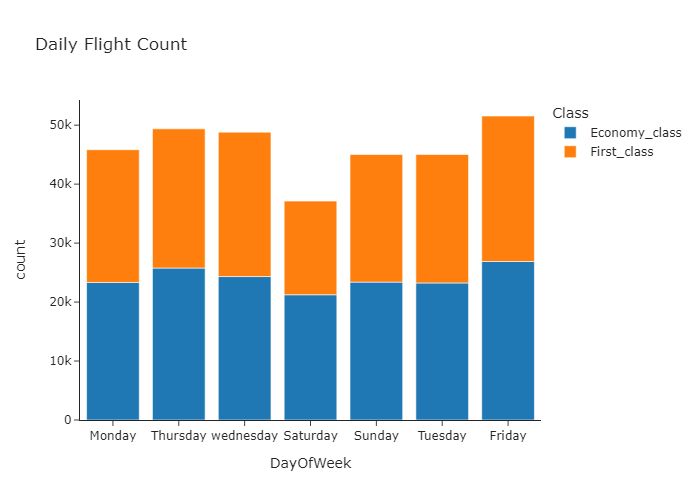

In [63]:
fig = px.histogram(df1, x='DayOfWeek', nbins=15, color='Class', template='simple_white', title='Daily Flight Count')
fig.show(renderer='png')

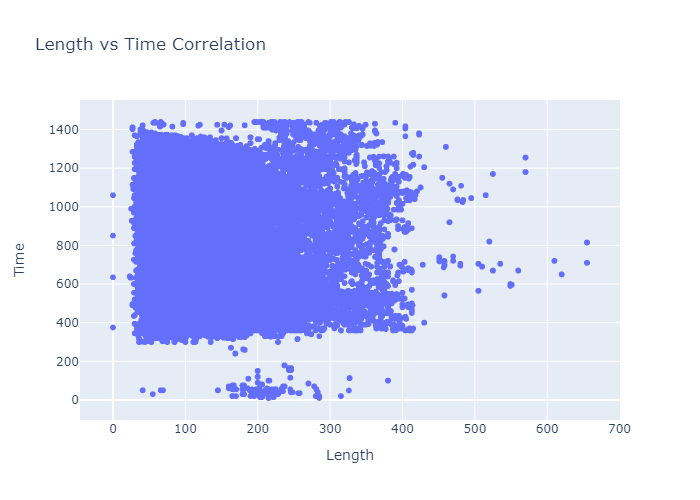

In [64]:
fig = px.scatter(df1, x='Length', y='Time', title='Length vs Time Correlation')
fig.show(renderer='png')

In [65]:
df2 = df1.groupby('Airline')['Length'].mean().reset_index()
df2.head(4)

,Airline,Length
0,9E,96.682014
1,AA,173.167602
2,AS,169.621132
3,B6,173.507794


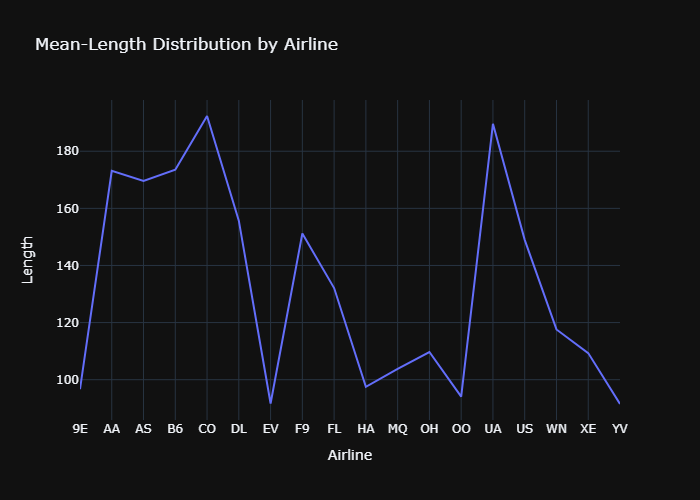

In [66]:
fig = px.line(df2, x='Airline', y='Length', template='plotly_dark', title='Mean-Length Distribution by Airline')
fig.show(renderer='png')

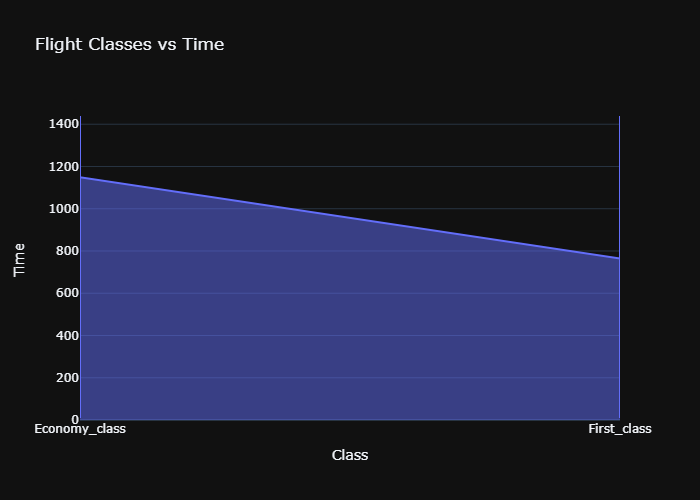

In [67]:
fig = px.area(df1, x='Class', y='Time', template='plotly_dark', title='Flight Classes vs Time')
fig.show(renderer='png')

In [68]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


## Convert categorical features to numeric

In [69]:
cat = df.select_dtypes('object')

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [71]:
for column in df.columns:
    if column in cat.columns:
        df[column] = encoder.fit_transform(df[column])

In [72]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0


## Checkout for outliers

In [73]:
df.describe()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000
mean,2566.701320,807.920471,130.888838,9.584889,143.388925,143.824336,3.951918,0.478994
std,2151.508621,276.710501,68.973069,5.201205,80.038261,79.870315,1.964822,0.499559
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,749.000000,575.000000,81.000000,5.000000,79.000000,79.000000,2.000000,0.000000
50%,1933.000000,805.000000,115.000000,11.000000,153.000000,153.000000,4.000000,0.000000
75%,4021.000000,1035.000000,160.000000,15.000000,208.000000,208.000000,6.000000,1.000000
max,7814.000000,1439.000000,655.000000,17.000000,292.000000,292.000000,7.000000,1.000000


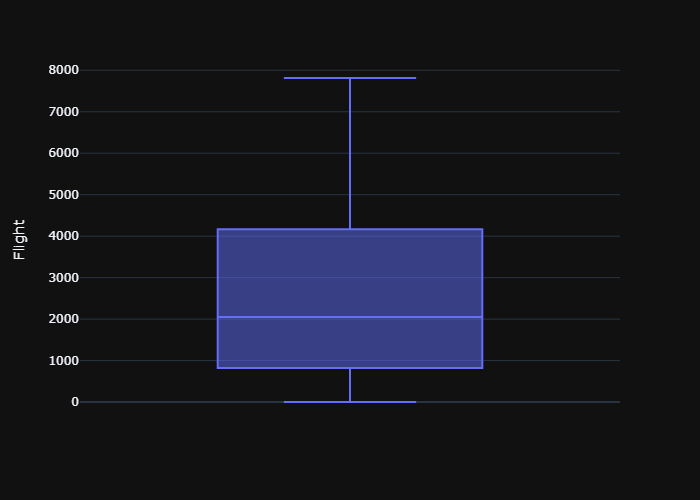

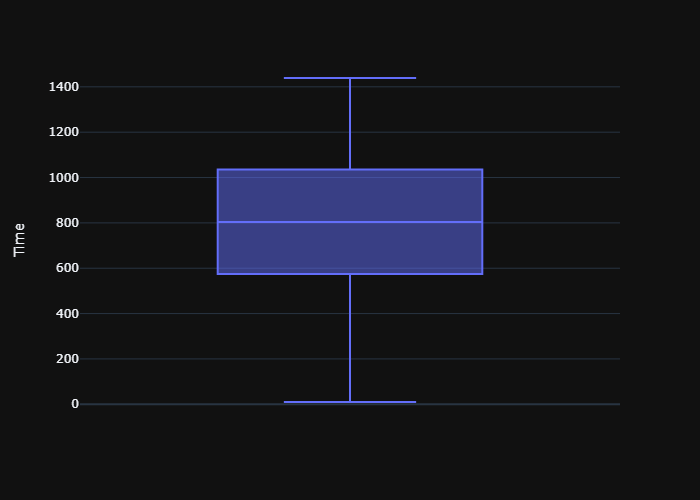

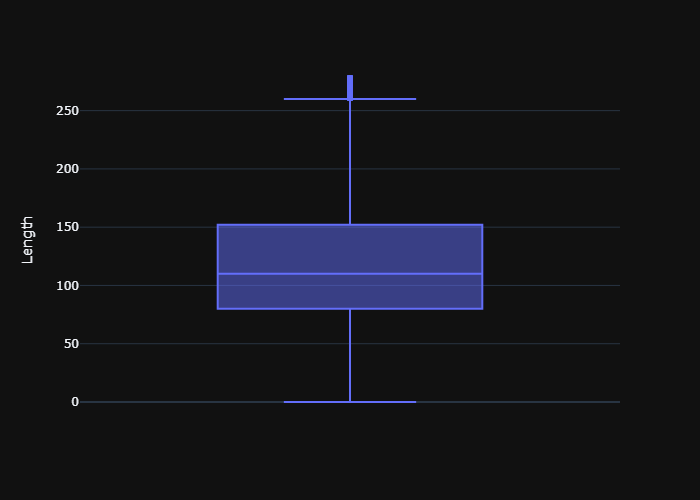

In [19]:
outliers = ['Flight', 'Time', 'Length']
for column in outliers:
    fig = px.box(df, y=column, template='plotly_dark')
    fig.show(renderer='png')

In [15]:
df.shape

(322764, 8)

## Get rid of outliers using InterQuartile Range

In [20]:
Q1 = np.percentile(df['Length'], 25)
Q3 = np.percentile(df['Length'], 75)

In [21]:
IQR = Q3 - Q1
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

df = df[(df['Length'] >= lowerbound) & (df['Length'] <= upperbound)]
df.shape

(302861, 8)

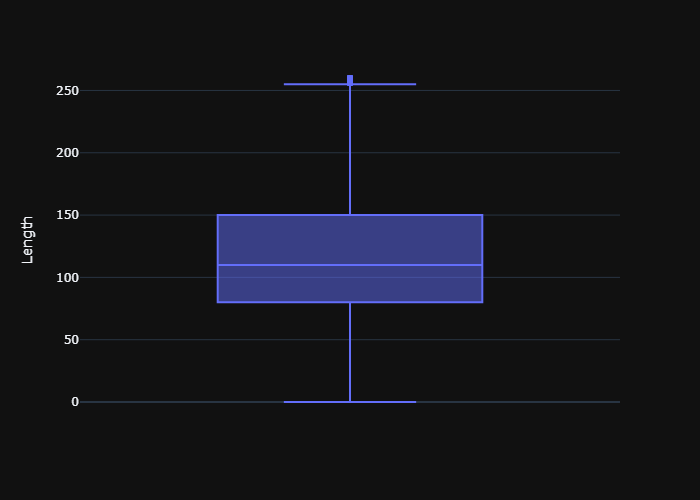

In [22]:
fig = px.box(df, y='Length', template='plotly_dark')
fig.show(renderer='png')

## Split the dataset into input(X) and output(y)

In [79]:
X = df.drop('Class', axis=1)
y = df[['Class']]

## Normalize the training set

In [80]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
X = scalar.fit_transform(X)
X

array([[ 0.07837272,  1.06956522,  0.43055556, ..., -1.0620155 ,
        -0.14728682, -0.75      ],
       [ 1.46485193, -0.96521739,  0.5       , ..., -0.68217054,
         0.46511628,  0.        ],
       [-0.24050254,  0.79565217,  0.45833333, ..., -0.91472868,
        -0.68217054, -0.25      ],
       ...,
       [-0.35477116,  0.94782609,  0.61111111, ...,  0.48837209,
         0.19379845,  0.75      ],
       [ 1.47233024, -0.59565217, -0.52777778, ..., -0.3255814 ,
         0.80620155,  0.25      ],
       [ 0.94466048,  0.05      , -0.5       , ..., -0.82170543,
        -1.02325581, -0.5       ]])

## Split the data into training/testing set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape

(245576, 7)

## Train model using deep neural network

In [99]:
model = keras.models.Sequential([
     keras.layers.Dense(256, input_shape=(7,), activation='relu'),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(32, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
  ])

## Print model summary

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               2048      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 45,313
Trainable params: 45,313
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [101]:
loss = keras.losses.BinaryCrossentropy()
optim = keras.optimizers.Nadam(learning_rate=0.001)
metric = ['accuracy']

In [102]:
model.compile(loss=loss, optimizer=optim, metrics=metric)

In [87]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01)

## Fit the features for training

In [105]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.6596 - accuracy: 0.5990 - val_loss: 0.6626 - val_accuracy: 0.5946
Epoch 2/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.6594 - accuracy: 0.5985 - val_loss: 0.6627 - val_accuracy: 0.5915
Epoch 3/10
1535/1535 [==============================] - 10s 6ms/step - loss: 0.6592 - accuracy: 0.5994 - val_loss: 0.6628 - val_accuracy: 0.5929
Epoch 4/10
1535/1535 [==============================] - 10s 7ms/step - loss: 0.6590 - accuracy: 0.5994 - val_loss: 0.6628 - val_accuracy: 0.5926
Epoch 5/10
1535/1535 [==============================] - 11s 7ms/step - loss: 0.6586 - accuracy: 0.5995 - val_loss: 0.6626 - val_accuracy: 0.5936
Epoch 6/10
1535/1535 [==============================] - 12s 7ms/step - loss: 0.6585 - accuracy: 0.5998 - val_loss: 0.6630 - val_accuracy: 0.5933
Epoch 7/10
1535/1535 [==============================] - 13s 8ms/step - loss: 0.6583 - accuracy: 0.6001 - val_loss: 0.6628 - val_accu

## Evaluate the model

In [106]:
model.evaluate(X_test, y_test, verbose=1)

1919/1919 [==============================] - 6s 3ms/step - loss: 0.6642 - accuracy: 0.5892


[0.6642419695854187, 0.5891780853271484]

In [107]:
model.save('airline.tf')

INFO:tensorflow:Assets written to: airline.tf\assets
